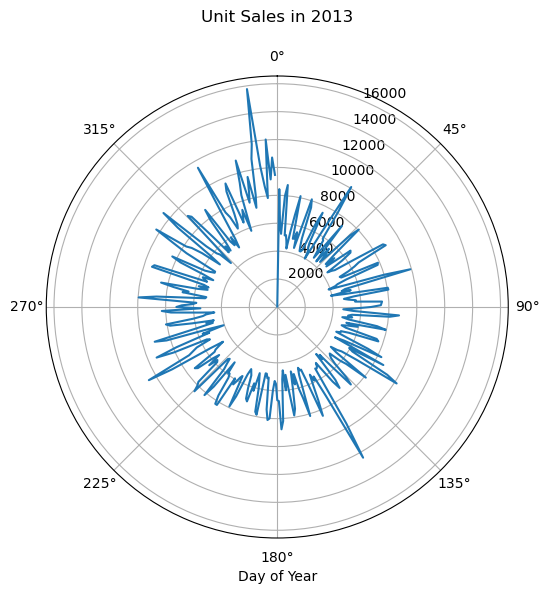

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data
df = pd.read_csv('../data/processed/sales_clean.csv', usecols=['date','unit_sales'])

# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Filter the data for the year 2013
df_2013 = df[df['date'].dt.year == 2013]

# Group the data by date and sum the unit sales for each day
daily_sales_2013 = df_2013.groupby(df_2013['date'].dt.dayofyear)['unit_sales'].sum()

# Calculate the angle for each day (in radians)
angles = np.deg2rad(np.linspace(0, 360, len(daily_sales_2013), endpoint=False))

# Plot the data in polar coordinates
plt.figure(figsize=(8, 6))
ax = plt.subplot(111, polar=True)
ax.plot(angles, daily_sales_2013)

# Customize the plot
ax.set_theta_offset(np.pi / 2)  # Start the plot from the top
ax.set_theta_direction(-1)       # Reverse the direction of the angles
ax.set_title('Unit Sales in 2013', pad=20)
ax.set_xlabel('Day of Year')
plt.show()


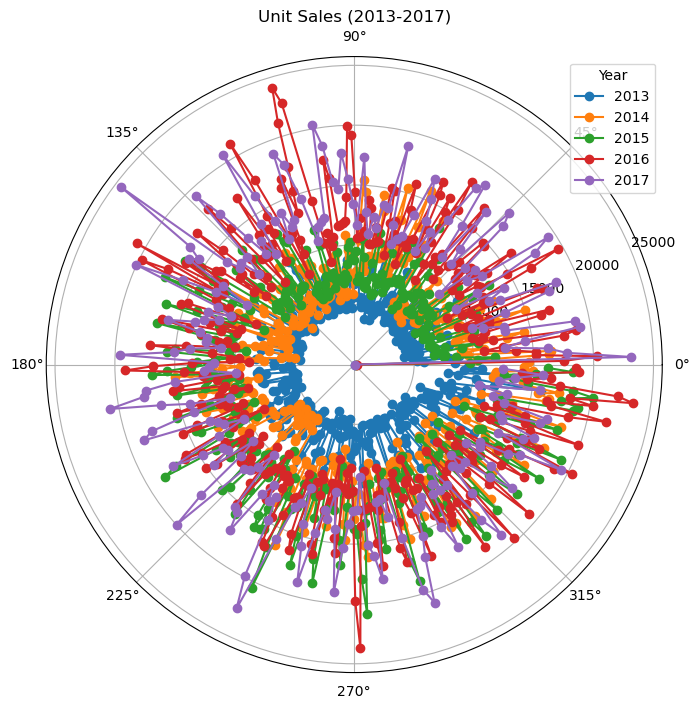

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data
df = pd.read_csv('../data/processed/sales_clean.csv', usecols=['date','unit_sales'])

# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Filter the data for the years 2013 to 2017
df_years = df[(df['date'].dt.year >= 2013) & (df['date'].dt.year <= 2017)]

# Group the data by year and day of year, summing the unit sales for each day
yearly_sales = df_years.groupby([df_years['date'].dt.year, df_years['date'].dt.dayofyear])['unit_sales'].sum()

# Create a polar plot for each year
plt.figure(figsize=(10, 8))
for year in range(2013, 2018):
    sales_year = yearly_sales[year]
    angles = np.deg2rad(np.linspace(0, 360, len(sales_year), endpoint=False))
    plt.polar(angles, sales_year, label=str(year), marker='o')

# Customize the plot
plt.title('Unit Sales (2013-2017)')
plt.legend(title='Year', loc='upper right')
plt.grid(True)

plt.show()


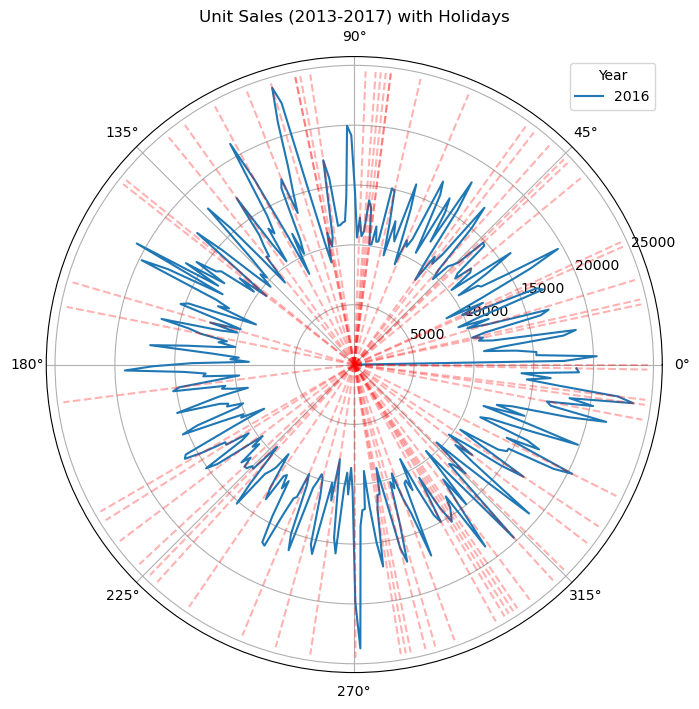

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data
df = pd.read_csv('../data/processed/sales_clean.csv', usecols=['date','unit_sales'])

# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Filter the data for the years 2013 to 2017
df_years = df[(df['date'].dt.year >= 2013) & (df['date'].dt.year <= 2017)]

# Group the data by year and day of year, summing the unit sales for each day
yearly_sales = df_years.groupby([df_years['date'].dt.year, df_years['date'].dt.dayofyear])['unit_sales'].sum()

# Create a polar plot for each year
plt.figure(figsize=(10, 8))
for year in range(2016, 2017):
    sales_year = yearly_sales[year]
    angles = np.deg2rad(np.linspace(0, 360, len(sales_year), endpoint=False))
    plt.polar(angles, sales_year, label=str(year))

# Plot holidays as rays
df_holidays = pd.read_csv('../data/processed/holidays_india_clean.csv')  # Load your holidays data
df_holidays['date'] = pd.to_datetime(df_holidays['date'])

# Filter holidays for the year 2013
df_holidays = df_holidays[df_holidays['date'].dt.year == 2013]

for holiday in df_holidays['date']:
    # Convert holiday date to day of year
    holiday_date = pd.to_datetime(holiday)
    day_of_year = holiday_date.timetuple().tm_yday
    
    # Calculate the angle for the holiday
    angle = np.deg2rad((day_of_year - 1) / 365 * 360)  # Convert day of year to angle
    
    # Plot ray for the holiday
    plt.polar([angle, angle], [0, yearly_sales.max()], linestyle='--', color='red', alpha=0.3)

# Customize the plot
plt.title('Unit Sales (2013-2017) with Holidays')
plt.legend(title='Year', loc='upper right')
plt.grid(True)

plt.show()



In [15]:
display(yearly_sales.iloc[1])
display(yearly_sales.max())

8447.323

24509.339